## IIIb. Remove lick artifacts in Ripple Band LFP.
Run this notebook only after artifact detection has been run in notebook II-2.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd

import spyglass as nd
import datajoint as dj
import multiprocessing

# ignore datajoint+jupyter async warnings
import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=ResourceWarning)
warnings.simplefilter('ignore', category=UserWarning)

import matplotlib.pyplot as plt

In [3]:
# We also import a bunch of tables so that we can call them easily
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.shijiegu.load import load_session_name
from spyglass.shijiegu.Analysis_SGU import EpochPos
from spyglass.shijiegu.ripple_detection import loadRippleLFP_OneChannelPerElectrode

# The workhorse of the experiment
from spyglass.shijiegu.ripple_detection import removeArtifactInFilteredData
from spyglass.common import IntervalList

[2024-07-03 10:37:33,016][INFO]: Connecting shijiegu-alt@lmf-db.cin.ucsf.edu:3306
[2024-07-03 10:37:33,087][INFO]: Connected shijiegu-alt@lmf-db.cin.ucsf.edu:3306


### The only cell to be edited:

In [29]:
nwb_file_name = 'eliot20221017.nwb'

### Run the rest

In [30]:
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

In [31]:
session_interval, sleep_interval = load_session_name(nwb_copy_file_name)

In [32]:
for s in session_interval:
    removeArtifactInFilteredData(nwb_copy_file_name, s,
                             filter_name = 'Ripple 150-250 Hz')

### Sanitycheck: at least the referencing etc should be the same. 
Some moments might be empty due to artifact removal

In [33]:
session_interval, sleep_interval = load_session_name(nwb_copy_file_name)
target_interval = session_interval[0]

position_valid_times = (IntervalList & {'nwb_file_name': nwb_copy_file_name,
                                        'interval_list_name': target_interval}).fetch1('valid_times')

filtered_lfps, filtered_lfps_t, CA1TetrodeInd, CCTetrodeInd = loadRippleLFP_OneChannelPerElectrode(
        nwb_copy_file_name,target_interval,position_valid_times,'artifact removed filtered data',1)

Using LFP from these eletrodes: 
[ 0  2  4  5 13 14 16 17 20 23 26 27 28 29 30 31]




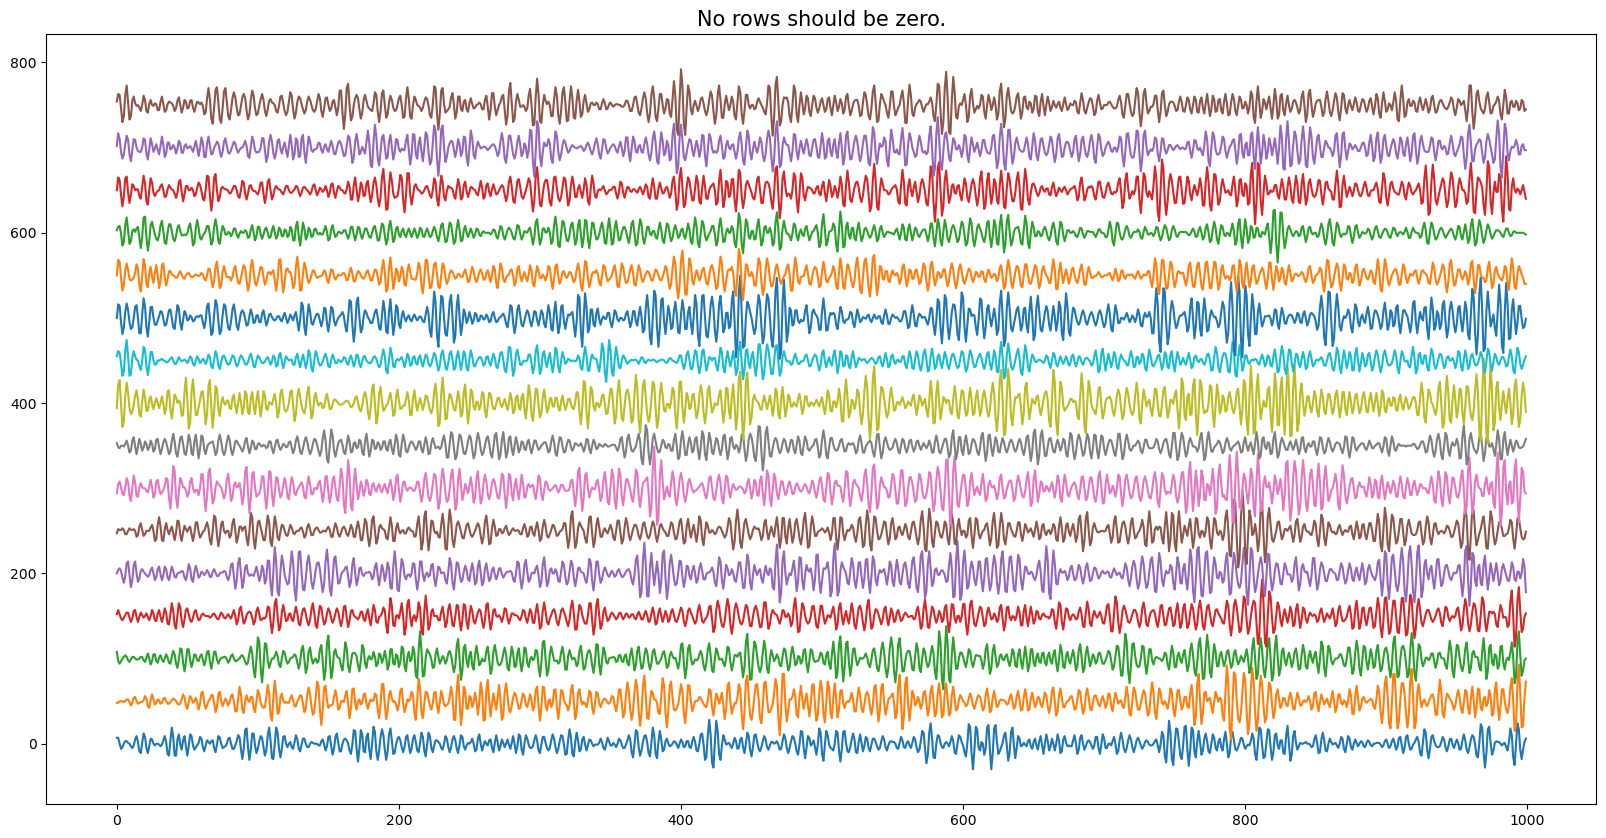

In [34]:
plt.subplots(ncols=1,nrows=1,figsize=(20,10))
r_ind = 0
for i in CA1TetrodeInd:
    plt.plot(filtered_lfps[50000:51000,i]+r_ind*50);
    r_ind += 1;
plt.title('No rows should be zero.',size = 15);

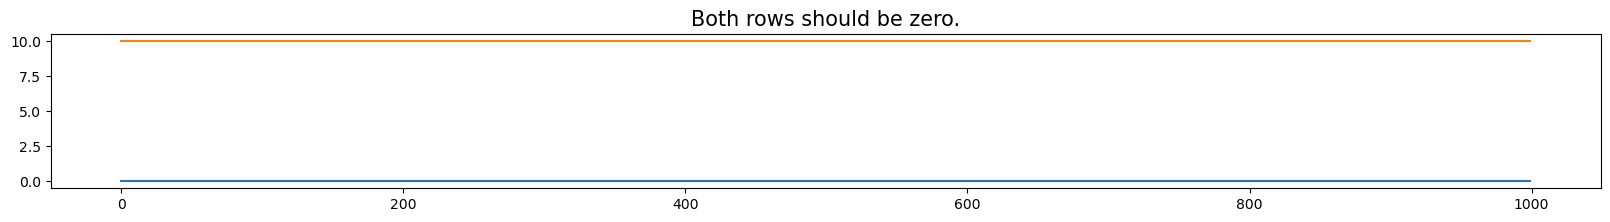

In [35]:
plt.subplots(ncols=1,nrows=1,figsize=(20,2))
r_ind = 0
for i in CCTetrodeInd:
    plt.plot(filtered_lfps[50000:51000,i]+r_ind*10);
    r_ind += 1;
plt.title('Both rows should be zero.',size = 15);

## END HERE